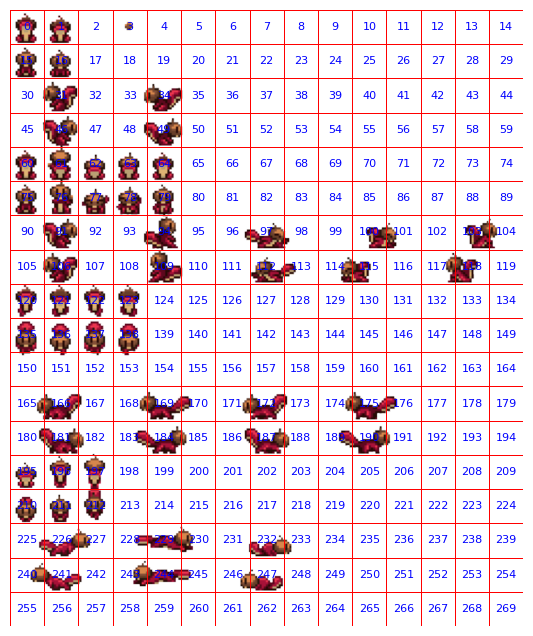

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Load the image
image_path = "assets/sq_sheet2.png"  # Replace with your image file path
image = Image.open(image_path)

def show_image(image, dx, dy, figsize=(10,10)):
        # Get image dimensions
        image_width, image_height = image.size

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=figsize)
        ax.imshow(image)

        # Overlay the grid and numbers
        cell_number = 0
        for y in range(0, image_height, dy):  # Rows
                for x in range(0, image_width, dx):  # Columns
                        # Draw grid cell border
                        ax.plot([x, x], [0, image_height], color="red", linewidth=0.5)  # Vertical lines
                        ax.plot([0, image_width], [y, y], color="red", linewidth=0.5)  # Horizontal lines
                        
                        # Calculate cell center
                        center_x = x + dx / 2
                        center_y = y + dy / 2
                        
                        # Display the cell number
                        ax.text(center_x, center_y, str(cell_number), color="blue", fontsize=8, 
                                ha="center", va="center")
                        cell_number += 1

        # Set axis limits and hide ticks
        ax.set_xlim(0, image_width)
        ax.set_ylim(image_height, 0)
        ax.axis("off")  # Turn off axis labels

        # Show the result
        plt.show()

show_image(image, 16,16,figsize=(8,8))

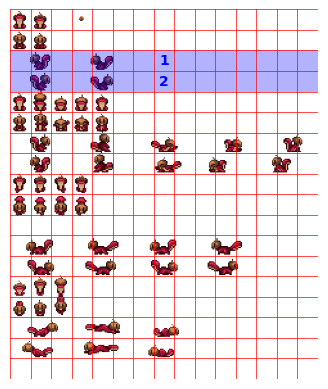

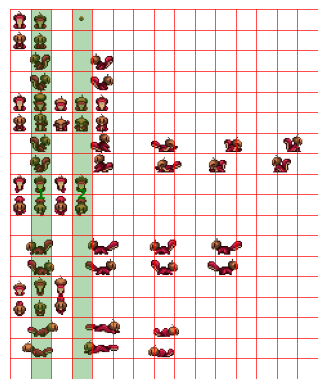

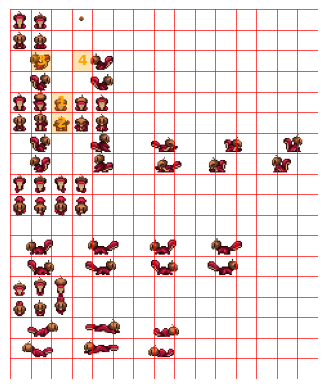

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def chopY(image, row_numbers, dx, dy, justshow=False):
    image_width, image_height = image.size
    chopped_images = []

    if justshow:
        fig, ax = plt.subplots()
        ax.imshow(image)

        # Draw grid
        for x in range(0, image_width, dx):
            ax.plot([x, x], [0, image_height], color="red", linewidth=0.5)
        for y in range(0, image_height, dy):
            ax.plot([0, image_width], [y, y], color="red", linewidth=0.5)

        # Highlight rows with IDs
        for idx, row in enumerate(row_numbers):
            start_y = row * dy
            rect = patches.Rectangle((0, start_y), image_width, dy, linewidth=0,
                                      edgecolor=None, facecolor="blue", alpha=0.3)
            ax.add_patch(rect)
            # Add ID as bold text in the same color
            ax.text(image_width / 2, start_y + dy / 2, f"{idx + 1}", 
                    color="blue", fontsize=10, ha="center", va="center", fontweight="bold")

        ax.set_xlim(0, image_width)
        ax.set_ylim(image_height, 0)
        ax.axis("off")
        plt.show()
        return

    # Chop rows
    for idx, row in enumerate(row_numbers):
        start_y = row * dy
        end_y = start_y + dy
        cropped_image = image.crop((0, start_y, image_width, end_y))
        chopped_images.append(cropped_image)

    return chopped_images


def chopX(image, column_numbers, dx, dy, justshow=False):
    image_width, image_height = image.size
    chopped_images = []

    if justshow:
        fig, ax = plt.subplots()
        ax.imshow(image)

        # Draw grid
        for x in range(0, image_width, dx):
            ax.plot([x, x], [0, image_height], color="red", linewidth=0.5)
        for y in range(0, image_height, dy):
            ax.plot([0, image_width], [y, y], color="red", linewidth=0.5)

        # Highlight columns with IDs
        for idx, col in enumerate(column_numbers):
            start_x = col * dx
            rect = patches.Rectangle((start_x, 0), dx, image_height, linewidth=0,
                                      edgecolor=None, facecolor="green", alpha=0.3)
            ax.add_patch(rect)
            # Add ID as bold text in the same color
            ax.text(start_x + dx / 2, image_height / 2, f"{idx + 1}", 
                    color="green", fontsize=10, ha="center", va="center", fontweight="bold")

        ax.set_xlim(0, image_width)
        ax.set_ylim(image_height, 0)
        ax.axis("off")
        plt.show()
        return

    # Chop columns
    for idx, col in enumerate(column_numbers):
        start_x = col * dx
        end_x = start_x + dx
        cropped_image = image.crop((start_x, 0, end_x, image_height))
        chopped_images.append(cropped_image)

    return chopped_images


def chopXY(image, cell_ranges, dx, dy, justshow=False):
    image_width, image_height = image.size
    chopped_images = []

    if justshow:
        fig, ax = plt.subplots()
        ax.imshow(image)

        # Draw grid
        for x in range(0, image_width, dx):
            ax.plot([x, x], [0, image_height], color="red", linewidth=0.5)
        for y in range(0, image_height, dy):
            ax.plot([0, image_width], [y, y], color="red", linewidth=0.5)

        # Highlight cells with IDs
        unique_id = 1  # Counter for unique IDs
        for cell in cell_ranges:
            x_range = cell['x']
            y_range = cell['y']
            for col in x_range:
                for row in y_range:
                    start_x = col * dx
                    start_y = row * dy
                    rect = patches.Rectangle((start_x, start_y), dx, dy, linewidth=0,
                                              edgecolor=None, facecolor="orange", alpha=0.3)
                    ax.add_patch(rect)
                    # Add ID as bold text in the same color
                    ax.text(start_x + dx / 2, start_y + dy / 2, f"{unique_id}", 
                            color="orange", fontsize=10, ha="center", va="center", fontweight="bold")
                    unique_id += 1

        ax.set_xlim(0, image_width)
        ax.set_ylim(image_height, 0)
        ax.axis("off")
        plt.show()
        return

    # Chop cells
    for cell in cell_ranges:
        x_range = cell['x']
        y_range = cell['y']
        for col in x_range:
            for row in y_range:
                start_x = col * dx
                end_x = start_x + dx
                start_y = row * dy
                end_y = start_y + dy
                cropped_image = image.crop((start_x, start_y, end_x, end_y))
                chopped_images.append(cropped_image)

    return chopped_images


# Load the image
image_path = "assets/sq_sheet2.png"  # Replace with your image file path
image = Image.open(image_path)

# Parameters for the grid
dx = 16  # Width of each cell
dy = 16  # Height of each cell

# Example usage for chopY
row_numbers = [2, 3]
chopY(image, row_numbers, dx, dy, justshow=True)

# Example usage for chopX
column_numbers = [1, 3]
chopX(image, column_numbers, dx, dy, justshow=True)

# Example usage for chopXY
cell_ranges = [
    {"x": [2], "y": [4, 5]},
    {"x": [1, 3], "y": [2]}
]
chopXY(image, cell_ranges, dx, dy, justshow=True)

save = 0
if save == 1:
    # Save chopped images
    chopped_rows = chopY(image, row_numbers, dx, dy)
    for idx, chopped_image in enumerate(chopped_rows):
        chopped_image.save(f"chopped_row_{row_numbers[idx]}.png")

    chopped_cols = chopX(image, column_numbers, dx, dy)
    for idx, chopped_image in enumerate(chopped_cols):
        chopped_image.save(f"chopped_col_{column_numbers[idx]}.png")

    chopped_cells = chopXY(image, cell_ranges, dx, dy)
    for idx, chopped_image in enumerate(chopped_cells):
        chopped_image.save(f"chopped_cell_{idx}.png")


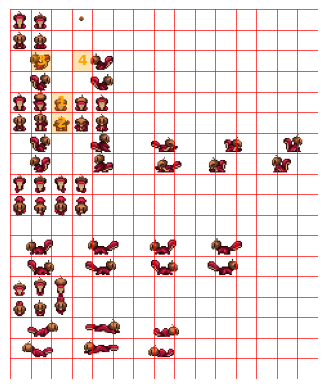

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def mergeChoppedRegions(chopped_regions, region_ids, merge_type="hor", show_result=False):
    """
    Merges chopped image regions either horizontally or vertically, and optionally displays the result.
    
    Parameters:
        chopped_regions (list of PIL.Image.Image): List of chopped images.
        region_ids (list of int): List of region IDs corresponding to the chopped regions.
        merge_type (str): "hor" for horizontal arrangement, "ver" for vertical arrangement.
        show_result (bool): If True, displays the merged image.
        
    Returns:
        PIL.Image.Image: Merged image.
    """
    if len(chopped_regions) == 0:
        raise ValueError("No regions provided to merge.")
    
    # Check merge type
    if merge_type not in ["hor", "ver"]:
        raise ValueError('Invalid merge type. Use "hor" for horizontal or "ver" for vertical.')

    # Determine the dimensions for the merged image
    if merge_type == "hor":
        total_width = sum(region.width for region in chopped_regions)
        max_height = max(region.height for region in chopped_regions)
        merged_image = Image.new("RGBA", (total_width, max_height), (255, 255, 255, 0))
        
        # Paste regions next to each other horizontally
        current_x = 0
        for region, region_id in zip(chopped_regions, region_ids):
            merged_image.paste(region, (current_x, 0))
            current_x += region.width

    elif merge_type == "ver":
        max_width = max(region.width for region in chopped_regions)
        total_height = sum(region.height for region in chopped_regions)
        merged_image = Image.new("RGBA", (max_width, total_height), (255, 255, 255, 0))
        
        # Paste regions on top of each other vertically
        current_y = 0
        for region, region_id in zip(chopped_regions, region_ids):
            merged_image.paste(region, (0, current_y))
            current_y += region.height

    # Display the merged image if requested
    if show_result:
        plt.figure(figsize=(8, 8))
        plt.imshow(merged_image)
        plt.axis("off")
        plt.title(f"Merged Image ({'Horizontal' if merge_type == 'hor' else 'Vertical'})")
        plt.show()

    return merged_image


# Example usage with the previously defined chopping functions
# Load the image
image_path = "assets/sq_sheet2.png"  # Replace with your image file path
image = Image.open(image_path)

# Parameters for the grid
dx = 16  # Width of each cell
dy = 16  # Height of each cell

# Chop specific regions
#cell_ranges = [
#    {"x": [2], "y": [4, 5]},
#    {"x": [1, 3], "y": [2]}
#]
#chopped_rows =  chopXY(image, cell_ranges, dx, dy, justshow=True)
#region_ids = [1, 2]  # IDs for the chopped regions

# Merge chopped rows horizontally and display
#merged_image_hor = mergeChoppedRegions(chopped_rows, region_ids, merge_type="hor", show_result=True)

# Merge chopped rows vertically and display
#merged_image_ver = mergeChoppedRegions(chopped_rows, region_ids, merge_type="ver", show_result=True)

# Optionally save the results
#merged_image_hor.save("merged_horizontal.png")
#merged_image_ver.save("merged_vertical.png")


### Chop the running rows 

In [56]:
# Example usage for chopY
row_numbers = [6, 7, 11, 12, 15, 16]
chopped = chopY(image, row_numbers, dx, dy, justshow=False)

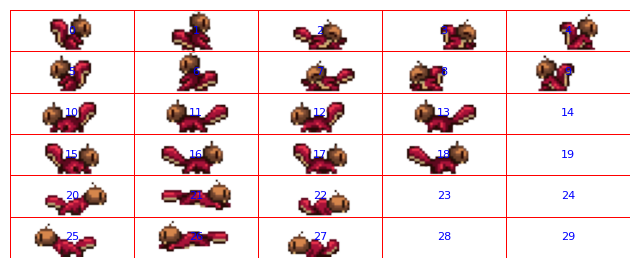

In [62]:
mimg =  mergeChoppedRegions(chopped, [1,2,3,4,5,6], merge_type="ver", show_result=False)
show_image(mimg, 48,16,figsize=(8,8))
mimg.save("assets/sqeek_run.png")

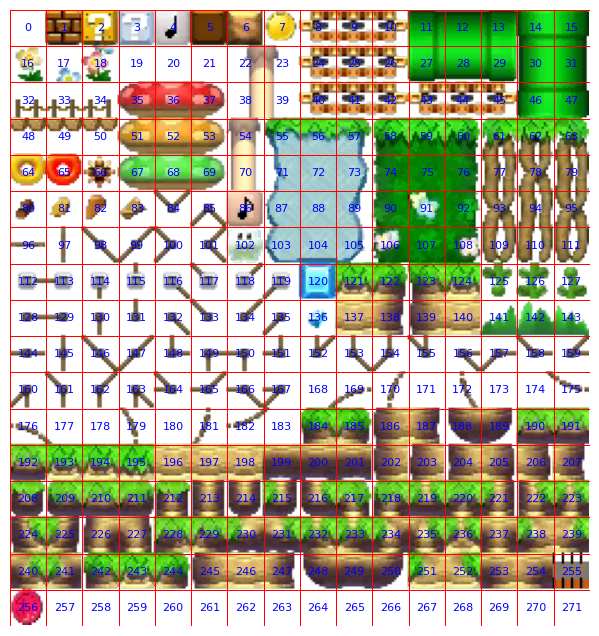

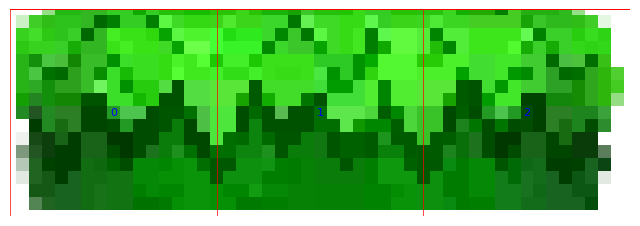

In [73]:
image_path = "assets/mario_sheet.png"  # Replace with your image file path
image = Image.open(image_path)
show_image(image, 16,16,figsize=(8,8))
cell_ranges = [
    {"y": [3], "x": [10, 11, 12 ]}
]
chopped = chopXY(image, cell_ranges, 16, 16, justshow=False)
mimg =  mergeChoppedRegions(chopped, [1,2,3], merge_type="hor", show_result=False)
show_image(mimg, 16,16,figsize=(8,8))
mimg.save("assets/grassground.png")

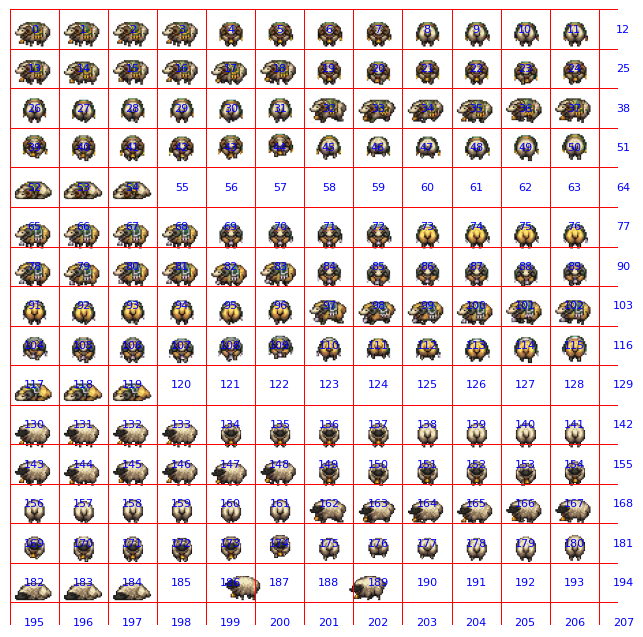

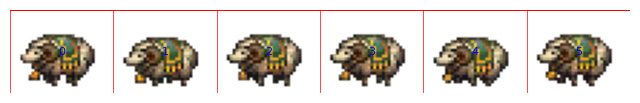

In [ ]:
image_path = "assets/sheep_sheet2.png"  # Replace with your image file path
image = Image.open(image_path)
show_image(image, 36,29,figsize=(8,8))

cell_ranges = [
    {"y": [1], "x": [0,1,2,3,4,5 ]}
]
chopped = chopXY(image, cell_ranges, 36, 29, justshow=False)
mimg =  mergeChoppedRegions(chopped, [1,2,3,4,5,6], merge_type="hor", show_result=False)
show_image(mimg, 36,29,figsize=(8,8))
mimg.save("assets/schnee.png")


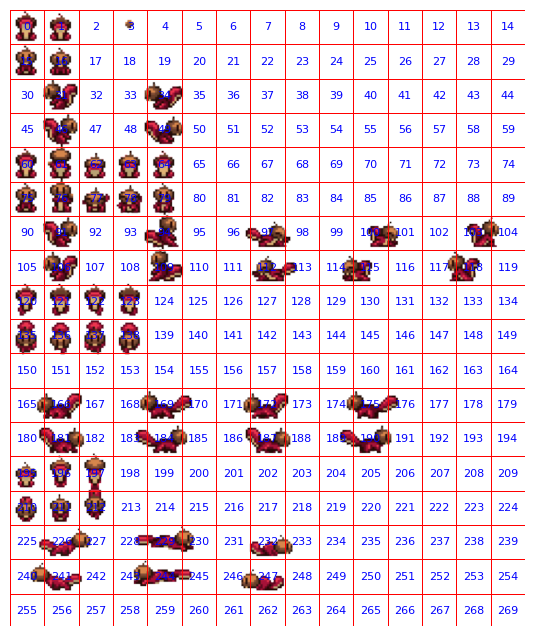

In [ ]:
# Chop of 0th row
row_numbers = np.arange(1,image.size[1])
chopped = chopY(image, row_numbers, image.size[1], 1, justshow=False)

row_numbers = np.arange(1,image.size[1])
chopped = chopY(image, row_numbers, image.size[1], 1, justshow=False)
final_im = mergeChoppedRegions(chopped, np.arange(0,image.size[1]-1), merge_type="ver", show_result=False)
show_image(final_im, 16,16,figsize=(8,8))


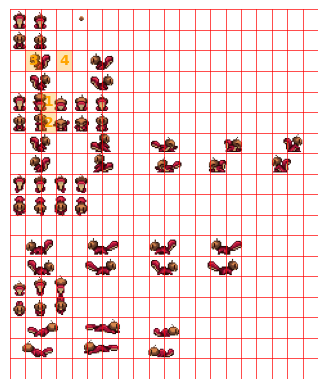

In [ ]:
# Load the image
image_path = "assets/mario_sheet.png"  # Replace with your image file path
image = Image.open(image_path)

# Parameters for the grid
dx = 12  # Width of each cell
dy = 16  # Height of each cell

# Chop specific regions
cell_ranges = [
    {"x": [2], "y": [4, 5]},
    {"x": [1, 3], "y": [2]}
]
chopXY(image, cell_ranges, dx, dy, justshow=True)
chopped_rows =  chopXY(image, cell_ranges, dx, dy, justshow=False)

In [21]:
chopped_rows

[<PIL.Image.Image image mode=RGBA size=16x16>,
 <PIL.Image.Image image mode=RGBA size=16x16>,
 <PIL.Image.Image image mode=RGBA size=16x16>,
 <PIL.Image.Image image mode=RGBA size=16x16>]

In [ ]:
final_im = mergeChoppedRegions(chopped_rows, [2,3,1,4], merge_type="ver", show_result=False)
